Washing Time: 32.88888888888891


/home/anjana/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


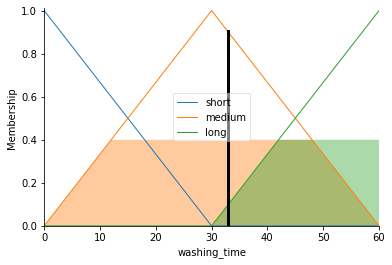

In [1]:
# Write a program to implement Fuzzy Controller(Washing Machine)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl



# Create fuzzy variables
dirtiness = ctrl.Antecedent(np.arange(0,11,1), 'dirtiness')
stain_type = ctrl.Antecedent(np.arange(0,11,1), 'stain type')
washing_time = ctrl.Consequent(np.arange(0, 61, 1), 'washing_time')


#define membership function
dirtiness['low'] = fuzz.trimf(dirtiness.universe, [0, 0, 5])
dirtiness['medium'] = fuzz.trimf(dirtiness.universe, [0, 5, 10])
dirtiness['high'] = fuzz.trimf(dirtiness.universe,[5, 10, 10])

stain_type['low'] = fuzz.trimf(stain_type.universe, [0, 0, 5])
stain_type['medium'] = fuzz.trimf(stain_type.universe, [0, 5, 10])
stain_type['high'] = fuzz.trimf(stain_type.universe,[5, 10, 10])

washing_time['short'] = fuzz.trimf(washing_time.universe, [0, 0, 30])
washing_time['medium'] = fuzz.trimf(washing_time.universe, [0, 30, 60])
washing_time['long'] = fuzz.trimf(washing_time.universe, [30, 60, 60])

#define rules
rule1 = ctrl.Rule(dirtiness['low'] & stain_type['low'], washing_time['short'])
rule2 = ctrl.Rule(dirtiness['medium'] & stain_type['medium'], washing_time['medium'])
rule3 = ctrl.Rule(dirtiness['high'] & stain_type['high'], washing_time['long'])

# Create control system
washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
washing_machine = ctrl.ControlSystemSimulation(washing_ctrl)
# Example usage
if __name__ == "__main__":
    # Set input values
    washing_machine.input['dirtiness'] = 7
    washing_machine.input['stain type'] = 8
    # Compute the result
    washing_machine.compute()
    # Print the output
    print("Washing Time:", washing_machine.output['washing_time'])
    # Visualize the result
    washing_time.view(sim=washing_machine)

